In [111]:
import pandas as pd
import numpy as np
import polars as pl
import os
from datetime import datetime as dt
from os import listdir
from os.path import isfile, join
import sketch
from pandas_datareader import data as web
import yfinance as yf
yf.pdr_override()
from summarytools import dfSummary

<font size = 6>Default Values</font>

In [3]:
#PATH = 
S_YEAR = 2020
S_MONTH = 1
S_DAY = 2
S_DATE = f"{S_YEAR}-{S_MONTH}-{S_DAY}"
S_DATE_DATETIME = dt(S_YEAR, S_MONTH, S_DAY)

E_YEAR = 2023
E_MONTH = 6
E_DAY = 28
E_DATE = f"{E_YEAR}-{E_MONTH}-{E_DAY}"
E_DATE_DATETIME = dt(E_YEAR, E_MONTH, E_DAY)

<font size = 6>Get Valid Dates</font>

In [69]:
def get_valid_dates(df, sdate, edate):
    #try:
        mask = (df['Date'] > sdate) & (df['Date'] <= edate)
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['Date'])
        sm_date = str(sm_df.index.date.min())
        last_date = str(sm_df.index.date.max())
        
        date_leading = '-'.join(('0' if len(x) < 2 else '')+x for x in sm_date.split('-'))
        date_ending  = '-'.join(('0' if len(x) < 2 else '')+x for x in last_date.split('-'))
        
    #except Exception:
    #    print("Date Corrupted")
    #else:
        return date_leading, date_ending

NameError: name 'df' is not defined

<font size = 6>CSV REUSABLE METHOD</font>

In [13]:
def get_df_info(csv):
    try:
        df = pd.read_csv(csv)    
    except FileNotFoundError:
        pass
    return df
        
            

In [92]:
sofi = web.get_data_yahoo('SOFI', start='2022-01-01', end='2023-07-10')

[*********************100%***********************]  1 of 1 completed


In [95]:
sofi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,16.100,16.129999,15.450,15.68,15.68,27500900
2022-01-04,15.610,15.861000,14.590,15.05,15.05,34175900
2022-01-05,14.880,15.230000,14.040,14.10,14.10,35103100
2022-01-06,14.016,14.270000,13.010,13.78,13.78,46269400
2022-01-07,13.821,14.400000,13.620,13.74,13.74,28716200
...,...,...,...,...,...,...
2023-06-30,8.920,9.410000,8.320,8.34,8.34,98034000
2023-07-03,8.360,8.640000,8.350,8.52,8.52,26842000
2023-07-05,8.490,8.680000,8.310,8.38,8.38,26954600


In [26]:
sofi.sketch.howto("how can i visualize adj close")

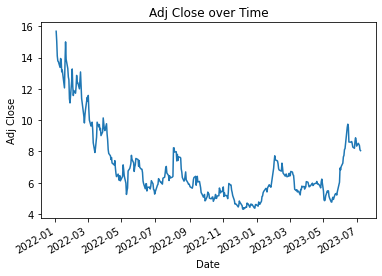

In [93]:


# import matplotlib library
import matplotlib.pyplot as plt

# create a line plot of the Adj Close column
sofi['Adj Close'].plot(kind='line')

# add labels to the plot
plt.title('Adj Close over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close')

# show the plot
plt.show()

In [107]:
sofi['Adj Close']

Date
2022-01-03    15.68
2022-01-04    15.05
2022-01-05    14.10
2022-01-06    13.78
2022-01-07    13.74
              ...  
2023-06-12     9.16
2023-06-13     9.54
2023-06-14     9.74
2023-06-15     9.55
2023-06-16     8.60
Name: Adj Close, Length: 366, dtype: float64

In [29]:
sofi.to_csv("sofi.csv")

In [ ]:
os.getcwd()

In [31]:
sofi.index.day

Int64Index([ 3,  4,  5,  6,  7, 10, 11, 12, 13, 14,
            ...
             5,  6,  7,  8,  9, 12, 13, 14, 15, 16],
           dtype='int64', name='Date', length=366)

In [34]:
sofi.shape

(366, 6)

In [96]:
nu = web.get_data_yahoo('nu', start='2022-01-01', end='2023-06-29')

[*********************100%***********************]  1 of 1 completed


In [97]:
nu

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,9.60,10.000,9.55,9.98,9.98,6896100
2022-01-04,10.15,10.220,9.48,9.74,9.74,8551800
2022-01-05,9.68,9.710,8.92,9.04,9.04,13773400
2022-01-06,9.01,9.530,8.46,9.52,9.52,11014200
2022-01-07,9.50,9.680,9.14,9.36,9.36,4784700
...,...,...,...,...,...,...
2023-06-22,7.64,7.716,7.45,7.49,7.49,27952400
2023-06-23,7.40,7.700,7.36,7.56,7.56,166404700
2023-06-26,7.52,7.580,7.22,7.31,7.31,21200600


In [39]:
nu.shape

(373, 6)

<font size = 6>NU - Stock Prices over 18 Months</font>

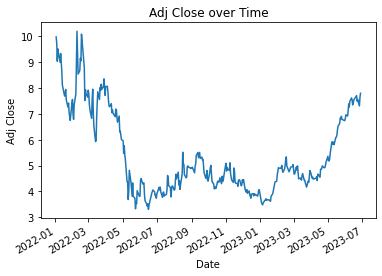

In [98]:
# create a line plot of the Adj Close column
nu['Adj Close'].plot(kind='line')

# add labels to the plot
plt.title('Adj Close over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close')

# show the plot
plt.show()

<font size = 6> NU - Minimum Price</font>

In [44]:
nu['Adj Close'].min()

3.309999942779541

<font size = 6> NU - Maximum Price</font>

In [45]:
nu['Adj Close'].max()

10.199999809265137

In [5]:
stocks_not_downloaded = []

<font size = 6>Download Stocks</font>

In [8]:
from datetime import datetime as dt
import time
from pandas_datareader import data as web

folder = "/home/champ/code/Python4Finance/champlist/"
folder2 = "/home/champ/code/Python4Finance/df_to_csv/"

def save_to_csv_from_yahoo(folder, ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt(syear, smonth, sday)
    end = dt(eyear, emonth, eday)
    try:
        print("Get Data for : ", ticker)
        df = web.get_data_yahoo(ticker, start, end)['Adj Close']
        time.sleep(10)
        df.to_csv(folder + ticker + '.csv')
    except Exception as ex:
        stocks_not_downloaded.append(ticker)
        print("Could not get data for: ", ticker)

<font size = 6>Stocks in Blox</font>

In [40]:
for x in range(3001, 3500):
    save_to_csv_from_yahoo(folder, tickers[x], 2020, 1, 1, 2023, 7, 7)
print("Finished")
stocks_not_downloaded

Get Data for :  USEG
[*********************100%***********************]  1 of 1 completed
Get Data for :  USFD
[*********************100%***********************]  1 of 1 completed
Get Data for :  USLM
[*********************100%***********************]  1 of 1 completed
Get Data for :  USM
[*********************100%***********************]  1 of 1 completed
Get Data for :  USNA
[*********************100%***********************]  1 of 1 completed
Get Data for :  USPH
[*********************100%***********************]  1 of 1 completed
Get Data for :  USWS
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['USWS']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  USX
[*********************100%***********************]  1 of 1 completed
Get Data for :  UTHR
[*********************100%***********************]  1 of 1 completed
Get Data for :  UTI
[*********************100%***********************]  1 of 1 completed
Get Data for :  UTL
[*********************100%***********************]  1 of 1 completed
Get Data for :  UTMD
[*********************100%***********************]  1 of 1 completed
Get Data for :  UUU
[*********************100%***********************]  1 of 1 completed
Get Data for :  UVE
[*********************100%***********************]  1 of 1 completed
Get Data for :  UVSP
[*********************100%***********************]  1 of 1 completed
Get Data for :  UVV
[*********************100%***********************]  1 of 1 completed
Get Data for :  V
[*********************100%***********************]  1 of 1 completed
Get Data for :  VAC
[*********************100%***********************]  1 of 1 completed
Get Data for :  VAL


1 Failed download:
['VAR']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VBFC
[*********************100%***********************]  1 of 1 completed
Get Data for :  VBIV
[*********************100%***********************]  1 of 1 completed
Get Data for :  VBTX
[*********************100%***********************]  1 of 1 completed
Get Data for :  VC
[*********************100%***********************]  1 of 1 completed
Get Data for :  VCEL
[*********************100%***********************]  1 of 1 completed
Get Data for :  VCRA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VCRA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VCTR
[*********************100%***********************]  1 of 1 completed
Get Data for :  VCYT
[*********************100%***********************]  1 of 1 completed
Get Data for :  VEC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VEC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VECO
[*********************100%***********************]  1 of 1 completed
Get Data for :  VEEV
[*********************100%***********************]  1 of 1 completed
Get Data for :  VER
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VER']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VERI
[*********************100%***********************]  1 of 1 completed
Get Data for :  VERU
[*********************100%***********************]  1 of 1 completed
Get Data for :  VFC
[*********************100%***********************]  1 of 1 completed
Get Data for :  VG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VG']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VGR
[*********************100%***********************]  1 of 1 completed
Get Data for :  VHC
[*********************100%***********************]  1 of 1 completed
Get Data for :  VIAV
[*********************100%***********************]  1 of 1 completed
Get Data for :  VICI
[*********************100%***********************]  1 of 1 completed
Get Data for :  VICR
[*********************100%***********************]  1 of 1 completed
Get Data for :  VIRC
[*********************100%***********************]  1 of 1 completed
Get Data for :  VIRT
[*********************100%***********************]  1 of 1 completed
Get Data for :  VIVO
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VIVO']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VKTX
[*********************100%***********************]  1 of 1 completed
Get Data for :  VLGEA
[*********************100%***********************]  1 of 1 completed
Get Data for :  VLO
[*********************100%***********************]  1 of 1 completed
Get Data for :  VLY
[*********************100%***********************]  1 of 1 completed
Get Data for :  VMC
[*********************100%***********************]  1 of 1 completed
Get Data for :  VMI
[*********************100%***********************]  1 of 1 completed
Get Data for :  VMW
[*********************100%***********************]  1 of 1 completed
Get Data for :  VNCE
[*********************100%***********************]  1 of 1 completed
Get Data for :  VNDA
[*********************100%***********************]  1 of 1 completed
Get Data for :  VNE
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VNE']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VNO
[*********************100%***********************]  1 of 1 completed
Get Data for :  VNRX
[*********************100%***********************]  1 of 1 completed
Get Data for :  VNTR
[*********************100%***********************]  1 of 1 completed
Get Data for :  VOXX
[*********************100%***********************]  1 of 1 completed
Get Data for :  VOYA
[*********************100%***********************]  1 of 1 completed
Get Data for :  VPG
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRA
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRAY
[*********************100%***********************]  1 of 1 completed
Get Data for :  VREX
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRNS
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRNT
[*********************100%***********************]  1 of 1 completed
Get Data for


1 Failed download:
['VRS']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VRSK
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRSN
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRTS
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRTU
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VRTU']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VRTV
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRTX
[*********************100%***********************]  1 of 1 completed
Get Data for :  VSAT
[*********************100%***********************]  1 of 1 completed
Get Data for :  VSEC
[*********************100%***********************]  1 of 1 completed
Get Data for :  VSH
[*********************100%***********************]  1 of 1 completed
Get Data for :  VSLR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VSLR']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VST
[*********************100%***********************]  1 of 1 completed
Get Data for :  VSTM
[*********************100%***********************]  1 of 1 completed
Get Data for :  VSTO
[*********************100%***********************]  1 of 1 completed
Get Data for :  VTNR
[*********************100%***********************]  1 of 1 completed
Get Data for :  VTR
[*********************100%***********************]  1 of 1 completed
Get Data for :  VTVT
[*********************100%***********************]  1 of 1 completed
Get Data for :  VUZI
[*********************100%***********************]  1 of 1 completed
Get Data for :  VVI
[*********************100%***********************]  1 of 1 completed
Get Data for :  VVUS
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VVUS']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VVV


Failed to get ticker 'VVV' reason: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)


[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VVV']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VXRT
[*********************100%***********************]  1 of 1 completed
Get Data for :  VYGR
[*********************100%***********************]  1 of 1 completed
Get Data for :  VZ
[*********************100%***********************]  1 of 1 completed
Get Data for :  W
[*********************100%***********************]  1 of 1 completed
Get Data for :  WAB
[*********************100%***********************]  1 of 1 completed
Get Data for :  WABC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WAFD
[*********************100%***********************]  1 of 1 completed
Get Data for :  WAL
[*********************100%***********************]  1 of 1 completed
Get Data for :  WASH
[*********************100%***********************]  1 of 1 completed
Get Data for :  WAT
[*********************100%***********************]  1 of 1 completed
Get Data for :  WATT
[*********************100%***********************]  1 of 1 completed
Get Data for :  W


1 Failed download:
['WBT']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WCC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WD
[*********************100%***********************]  1 of 1 completed
Get Data for :  WDAY
[*********************100%***********************]  1 of 1 completed
Get Data for :  WDC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WDFC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WDR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WDR']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WEC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WELL
[*********************100%***********************]  1 of 1 completed
Get Data for :  WEN
[*********************100%***********************]  1 of 1 completed
Get Data for :  WERN
[*********************100%***********************]  1 of 1 completed
Get Data for :  WETF
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WETF']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WEX
[*********************100%***********************]  1 of 1 completed
Get Data for :  WEYS
[*********************100%***********************]  1 of 1 completed
Get Data for :  WFC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WGO
[*********************100%***********************]  1 of 1 completed
Get Data for :  WH
[*********************100%***********************]  1 of 1 completed
Get Data for :  WHD
[*********************100%***********************]  1 of 1 completed
Get Data for :  WHG
[*********************100%***********************]  1 of 1 completed
Get Data for :  WHLM
[*********************100%***********************]  1 of 1 completed
Get Data for :  WHLR
[*********************100%***********************]  1 of 1 completed
Get Data for :  WHR
[*********************100%***********************]  1 of 1 completed
Get Data for :  WIFI
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WIFI']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WINA
[*********************100%***********************]  1 of 1 completed
Get Data for :  WING
[*********************100%***********************]  1 of 1 completed
Get Data for :  WIRE
[*********************100%***********************]  1 of 1 completed
Get Data for :  WK
[*********************100%***********************]  1 of 1 completed
Get Data for :  WKHS
[*********************100%***********************]  1 of 1 completed
Get Data for :  WLDN
[*********************100%***********************]  1 of 1 completed
Get Data for :  WLFC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WLFC']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-01 00:00:00 -> 2023-07-07 00:00:00)')



Get Data for :  WLK
[*********************100%***********************]  1 of 1 completed
Get Data for :  WLL
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WLL']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WLTW
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WLTW']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WM
[*********************100%***********************]  1 of 1 completed
Get Data for :  WMB
[*********************100%***********************]  1 of 1 completed
Get Data for :  WMC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WMGI
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WMGI']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WMK
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WMK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-01 00:00:00 -> 2023-07-07 00:00:00)')



Get Data for :  WMS
[*********************100%***********************]  1 of 1 completed
Get Data for :  WMT
[*********************100%***********************]  1 of 1 completed
Get Data for :  WNC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WNEB
[*********************100%***********************]  1 of 1 completed
Get Data for :  WOR
[*********************100%***********************]  1 of 1 completed
Get Data for :  WOW
[*********************100%***********************]  1 of 1 completed
Get Data for :  WPC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WPG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WPG']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WPX
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WPX']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WRB
[*********************100%***********************]  1 of 1 completed
Get Data for :  WRE
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WRE']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WRI
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WRI']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WRK
[*********************100%***********************]  1 of 1 completed
Get Data for :  WRLD
[*********************100%***********************]  1 of 1 completed
Get Data for :  WRTC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WRTC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WSBC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WSBF
[*********************100%***********************]  1 of 1 completed
Get Data for :  WSC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WSFS
[*********************100%***********************]  1 of 1 completed
Get Data for :  WSM
[*********************100%***********************]  1 of 1 completed
Get Data for :  WSO
[*********************100%***********************]  1 of 1 completed
Get Data for :  WSR
[*********************100%***********************]  1 of 1 completed
Get Data for :  WST
[*********************100%***********************]  1 of 1 completed
Get Data for :  WSTG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WSTG']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WSTL
[*********************100%***********************]  1 of 1 completed
Get Data for :  WTBA
[*********************100%***********************]  1 of 1 completed
Get Data for :  WTFC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WTI
[*********************100%***********************]  1 of 1 completed
Get Data for :  WTM
[*********************100%***********************]  1 of 1 completed
Get Data for :  WTRH
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WTRH']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WTS
[*********************100%***********************]  1 of 1 completed
Get Data for :  WTT
[*********************100%***********************]  1 of 1 completed
Get Data for :  WTTR
[*********************100%***********************]  1 of 1 completed
Get Data for :  WU
[*********************100%***********************]  1 of 1 completed
Get Data for :  WVE
[*********************100%***********************]  1 of 1 completed
Get Data for :  WVFC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WVVI
[*********************100%***********************]  1 of 1 completed
Get Data for :  WWD
[*********************100%***********************]  1 of 1 completed
Get Data for :  WWE
[*********************100%***********************]  1 of 1 completed
Get Data for :  WWR
[*********************100%***********************]  1 of 1 completed
Get Data for :  WWW
[*********************100%***********************]  1 of 1 completed
Get Data for :  WY


1 Failed download:
['WYND']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WYNN
[*********************100%***********************]  1 of 1 completed
Get Data for :  WYY
[*********************100%***********************]  1 of 1 completed
Get Data for :  X
[*********************100%***********************]  1 of 1 completed
Get Data for :  XAN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['XAN']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  XBIT
[*********************100%***********************]  1 of 1 completed
Get Data for :  XEC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['XEC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  XEL
[*********************100%***********************]  1 of 1 completed
Get Data for :  XELA
[*********************100%***********************]  1 of 1 completed
Get Data for :  XELB
[*********************100%***********************]  1 of 1 completed
Get Data for :  XENT
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['XENT']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  XERS
[*********************100%***********************]  1 of 1 completed
Get Data for :  XHR
[*********************100%***********************]  1 of 1 completed
Get Data for :  XLNX
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  XLRN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['XLRN']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  XNCR
[*********************100%***********************]  1 of 1 completed
Get Data for :  XOG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['XOG']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  XOM
[*********************100%***********************]  1 of 1 completed
Get Data for :  XOMA
[*********************100%***********************]  1 of 1 completed
Get Data for :  XONE
[*********************100%***********************]  1 of 1 completed
Get Data for :  XPER
[*********************100%***********************]  1 of 1 completed
Get Data for :  XPL
[*********************100%***********************]  1 of 1 completed
Get Data for :  XPO
[*********************100%***********************]  1 of 1 completed
Get Data for :  XRAY
[*********************100%***********************]  1 of 1 completed
Get Data for :  XRX
[*********************100%***********************]  1 of 1 completed
Get Data for :  XSPA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['XSPA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  XTNT
[*********************100%***********************]  1 of 1 completed
Get Data for :  XXII
[*********************100%***********************]  1 of 1 completed
Get Data for :  XYL
[*********************100%***********************]  1 of 1 completed
Get Data for :  Y
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['Y']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  YELP
[*********************100%***********************]  1 of 1 completed
Get Data for :  YETI
[*********************100%***********************]  1 of 1 completed
Get Data for :  YEXT
[*********************100%***********************]  1 of 1 completed
Get Data for :  YMAB
[*********************100%***********************]  1 of 1 completed
Get Data for :  YORW
[*********************100%***********************]  1 of 1 completed
Get Data for :  YRCW
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['YRCW']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  YTEN
[*********************100%***********************]  1 of 1 completed
Get Data for :  YUM
[*********************100%***********************]  1 of 1 completed
Get Data for :  Z
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZAGG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZAGG']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZBH
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZBRA
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZDGE
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZEN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZEN']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZEUS
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZG
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZGNX
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZGNX']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZION
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZIOP
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZIOP']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZIXI
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZIXI']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZM
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZN']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZNGA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZS
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZSAN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZSAN']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZTS
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZUMZ
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZUO
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZYNE
[*********************100%***********************]  1 of 1 completed
Get Data for :  UONEK
[*********************100%***********************]  1 of 1 completed
Get Data for :  URBN
[*********************100%***********************]  1 of 1 completed
Get Data for :  UROV
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['UROV']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  UBA
[*********************100%***********************]  1 of 1 completed
Get Data for :  ECOL
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ECOL']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  USEG
[*********************100%***********************]  1 of 1 completed
Get Data for :  USFD
[*********************100%***********************]  1 of 1 completed
Get Data for :  USWS
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['USWS']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  USX
[*********************100%***********************]  1 of 1 completed
Get Data for :  USAT
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['USAT']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  USAK
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['USAK']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  USNA
[*********************100%***********************]  1 of 1 completed
Get Data for :  USIO
[*********************100%***********************]  1 of 1 completed
Get Data for :  UTMD
[*********************100%***********************]  1 of 1 completed
Get Data for :  EGY
[*********************100%***********************]  1 of 1 completed
Get Data for :  MTN
[*********************100%***********************]  1 of 1 completed
Get Data for :  VAL
[*********************100%***********************]  1 of 1 completed
Get Data for :  VLO
[*********************100%***********************]  1 of 1 completed
Get Data for :  VLY
[*********************100%***********************]  1 of 1 completed
Get Data for :  VMI
[*********************100%***********************]  1 of 1 completed
Get Data for :  VALU
[*********************100%***********************]  1 of 1 completed
Get Data for :  VVV
[*********************100%***********************]  1 of 1 completed
Get Data for :  


1 Failed download:
['VAR']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VRNS
[*********************100%***********************]  1 of 1 completed
Get Data for :  VXRT
[*********************100%***********************]  1 of 1 completed
Get Data for :  VBIV
[*********************100%***********************]  1 of 1 completed
Get Data for :  VGR
[*********************100%***********************]  1 of 1 completed
Get Data for :  VEC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VEC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VECO
[*********************100%***********************]  1 of 1 completed
Get Data for :  VEEV
[*********************100%***********************]  1 of 1 completed
Get Data for :  VNTR
[*********************100%***********************]  1 of 1 completed
Get Data for :  VTR
[*********************100%***********************]  1 of 1 completed
Get Data for :  VNE
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VNE']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VRA
[*********************100%***********************]  1 of 1 completed
Get Data for :  VCYT
[*********************100%***********************]  1 of 1 completed
Get Data for :  VSTM
[*********************100%***********************]  1 of 1 completed
Get Data for :  VER
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VER']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VCEL
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRNT
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRSN
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRSK
[*********************100%***********************]  1 of 1 completed
Get Data for :  VBTX
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRTV
[*********************100%***********************]  1 of 1 completed
Get Data for :  VERI
[*********************100%***********************]  1 of 1 completed
Get Data for :  VZ
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRML
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VRML']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VRRM
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRS
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VRS']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VTNR
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRTX
[*********************100%***********************]  1 of 1 completed
Get Data for :  VERU
[*********************100%***********************]  1 of 1 completed
Get Data for :  VFC
[*********************100%***********************]  1 of 1 completed
Get Data for :  CBS
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['CBS']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VVI
[*********************100%***********************]  1 of 1 completed
Get Data for :  VSAT
[*********************100%***********************]  1 of 1 completed
Get Data for :  VIAV
[*********************100%***********************]  1 of 1 completed
Get Data for :  VICL
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VICL']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VICI
[*********************100%***********************]  1 of 1 completed
Get Data for :  VICR
[*********************100%***********************]  1 of 1 completed
Get Data for :  VCTR
[*********************100%***********************]  1 of 1 completed
Get Data for :  VRAY
[*********************100%***********************]  1 of 1 completed
Get Data for :  VKTX
[*********************100%***********************]  1 of 1 completed
Get Data for :  VBFC
[*********************100%***********************]  1 of 1 completed
Get Data for :  VLGEA
[*********************100%***********************]  1 of 1 completed
Get Data for :  VNCE
[*********************100%***********************]  1 of 1 completed
Get Data for :  VIRC
[*********************100%***********************]  1 of 1 completed
Get Data for :  VHC
[*********************100%***********************]  1 of 1 completed
Get Data for :  VIRT
[*********************100%***********************]  1 of 1 completed
Get Data 


1 Failed download:
['VRTU']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  V
[*********************100%***********************]  1 of 1 completed
Get Data for :  VSH
[*********************100%***********************]  1 of 1 completed
Get Data for :  VPG
[*********************100%***********************]  1 of 1 completed
Get Data for :  VISL
[*********************100%***********************]  1 of 1 completed
Get Data for :  VSTO
[*********************100%***********************]  1 of 1 completed
Get Data for :  VC
[*********************100%***********************]  1 of 1 completed
Get Data for :  VST
[*********************100%***********************]  1 of 1 completed
Get Data for :  VSI
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VSI']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VSLR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VSLR']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VVUS
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VVUS']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VMW
[*********************100%***********************]  1 of 1 completed
Get Data for :  VCRA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VCRA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VNRX
[*********************100%***********************]  1 of 1 completed
Get Data for :  VISI
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VISI']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['VG']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  VNO
[*********************100%***********************]  1 of 1 completed
Get Data for :  VOXX
[*********************100%***********************]  1 of 1 completed
Get Data for :  VOYA
[*********************100%***********************]  1 of 1 completed
Get Data for :  VYGR
[*********************100%***********************]  1 of 1 completed
Get Data for :  VSEC
[*********************100%***********************]  1 of 1 completed
Get Data for :  VTVT
[*********************100%***********************]  1 of 1 completed
Get Data for :  VMC
[*********************100%***********************]  1 of 1 completed
Get Data for :  VUZI
[*********************100%***********************]  1 of 1 completed
Get Data for :  WTI
[*********************100%***********************]  1 of 1 completed
Get Data for :  WPC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WRB
[*********************100%***********************]  1 of 1 completed
Get Data for :


1 Failed download:
['GRA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  GWW
[*********************100%***********************]  1 of 1 completed
Get Data for :  WNC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WBC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WBC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WDR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WDR']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WTRH
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WTRH']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WBA
[*********************100%***********************]  1 of 1 completed
Get Data for :  WD
[*********************100%***********************]  1 of 1 completed
Get Data for :  WMT
[*********************100%***********************]  1 of 1 completed
Get Data for :  HCC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WAFD
[*********************100%***********************]  1 of 1 completed
Get Data for :  WPG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WPG']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WRE
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WRE']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WASH
[*********************100%***********************]  1 of 1 completed
Get Data for :  WM
[*********************100%***********************]  1 of 1 completed
Get Data for :  WAT
[*********************100%***********************]  1 of 1 completed
Get Data for :  WSBF
[*********************100%***********************]  1 of 1 completed
Get Data for :  WSO
[*********************100%***********************]  1 of 1 completed
Get Data for :  WTS
[*********************100%***********************]  1 of 1 completed
Get Data for :  WVE
[*********************100%***********************]  1 of 1 completed
Get Data for :  W
[*********************100%***********************]  1 of 1 completed
Get Data for :  WSTG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WSTG']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WDFC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WBS
[*********************100%***********************]  1 of 1 completed
Get Data for :  WEC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WRI
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WRI']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WMK
[*********************100%***********************]  1 of 1 completed
Get Data for :  WBT
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WBT']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WCG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WCG']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WEBK
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WEBK']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WFC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WELL
[*********************100%***********************]  1 of 1 completed
Get Data for :  WERN
[*********************100%***********************]  1 of 1 completed
Get Data for :  WSBC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WAIR
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WAIR']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WCC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WTBA
[*********************100%***********************]  1 of 1 completed
Get Data for :  WST
[*********************100%***********************]  1 of 1 completed
Get Data for :  WABC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WSTL
[*********************100%***********************]  1 of 1 completed
Get Data for :  WAL
[*********************100%***********************]  1 of 1 completed
Get Data for :  WMC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WDC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WNEB
[*********************100%***********************]  1 of 1 completed
Get Data for :  WAB
[*********************100%***********************]  1 of 1 completed
Get Data for :  WLK
[*********************100%***********************]  1 of 1 completed
Get Data for :  


1 Failed download:
['WLL']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WOW
[*********************100%***********************]  1 of 1 completed
Get Data for :  WYY
[*********************100%***********************]  1 of 1 completed
Get Data for :  WHLM
[*********************100%***********************]  1 of 1 completed
Get Data for :  WVVI
[*********************100%***********************]  1 of 1 completed
Get Data for :  WLDN
[*********************100%***********************]  1 of 1 completed
Get Data for :  WLH
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WLH']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WSM
[*********************100%***********************]  1 of 1 completed
Get Data for :  WLFC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WLTW
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WLTW']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WSC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WING
[*********************100%***********************]  1 of 1 completed
Get Data for :  WINA
[*********************100%***********************]  1 of 1 completed
Get Data for :  WGO
[*********************100%***********************]  1 of 1 completed
Get Data for :  WTFC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WTT
[*********************100%***********************]  1 of 1 completed
Get Data for :  WETF
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WETF']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WWW
[*********************100%***********************]  1 of 1 completed
Get Data for :  WWD
[*********************100%***********************]  1 of 1 completed
Get Data for :  WDAY
[*********************100%***********************]  1 of 1 completed
Get Data for :  WKHS
[*********************100%***********************]  1 of 1 completed
Get Data for :  WK
[*********************100%***********************]  1 of 1 completed
Get Data for :  WRLD
[*********************100%***********************]  1 of 1 completed
Get Data for :  INT
[*********************100%***********************]  1 of 1 completed
Get Data for :  WWE
[*********************100%***********************]  1 of 1 completed
Get Data for :  WOR
[*********************100%***********************]  1 of 1 completed
Get Data for :  WPX
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WPX']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WRTC
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WRTC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WMGI
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WMGI']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WSFS
[*********************100%***********************]  1 of 1 completed
Get Data for :  WVFC
[*********************100%***********************]  1 of 1 completed
Get Data for :  WW
[*********************100%***********************]  1 of 1 completed
Get Data for :  WYND
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['WYND']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  WH
[*********************100%***********************]  1 of 1 completed
Get Data for :  WYNN
[*********************100%***********************]  1 of 1 completed
Get Data for :  XFOR
[*********************100%***********************]  1 of 1 completed
Get Data for :  XBIT
[*********************100%***********************]  1 of 1 completed
Get Data for :  XELB
[*********************100%***********************]  1 of 1 completed
Get Data for :  XEL
[*********************100%***********************]  1 of 1 completed
Get Data for :  XNCR
[*********************100%***********************]  1 of 1 completed
Get Data for :  XHR
[*********************100%***********************]  1 of 1 completed
Get Data for :  XERS
[*********************100%***********************]  1 of 1 completed
Get Data for :  XRX
[*********************100%***********************]  1 of 1 completed
Get Data for :  XLNX
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['XLNX']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  XOMA
[*********************100%***********************]  1 of 1 completed
Get Data for :  XPER
[*********************100%***********************]  1 of 1 completed
Get Data for :  XPO
[*********************100%***********************]  1 of 1 completed
Get Data for :  XSPA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['XSPA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  XTNT
[*********************100%***********************]  1 of 1 completed
Get Data for :  XYL
[*********************100%***********************]  1 of 1 completed
Get Data for :  YELP
[*********************100%***********************]  1 of 1 completed
Get Data for :  YETI
[*********************100%***********************]  1 of 1 completed
Get Data for :  YEXT
[*********************100%***********************]  1 of 1 completed
Get Data for :  YTEN
[*********************100%***********************]  1 of 1 completed
Get Data for :  YMAB
[*********************100%***********************]  1 of 1 completed
Get Data for :  YORW
[*********************100%***********************]  1 of 1 completed
Get Data for :  YRCW
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['YRCW']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  YUM
[*********************100%***********************]  1 of 1 completed
Get Data for :  YUMA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['YUMA']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  CTIB
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZFGN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZFGN']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZAGG
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZAGG']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZAYO
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZAYO']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZBRA
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZDGE
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZEN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZEN']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  Z
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZG
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZBH
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZN']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZION
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZIOP
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZIOP']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZIXI
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZIXI']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZTS
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZGNX
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZGNX']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZM
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZSAN
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZSAN']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZVO
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZVO']: Exception('%ticker%: No timezone found, symbol may be delisted')



Get Data for :  ZS
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZUMZ
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZUO
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZYNE
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZYXI
[*********************100%***********************]  1 of 1 completed
Get Data for :  ZNGA
[*********************100%***********************]  1 of 1 completed


1 Failed download:
['ZNGA']: Exception('%ticker%: No timezone found, symbol may be delisted')


KeyError: 3481

In [41]:
stocks_not_downloaded

[]

<font size = 6>Get DF from CSV</font>

In [6]:
def get_stock_df_from_csv(folder, ticker):
    try:
        df = pd.read_csv(folder + ticker + '.csv')
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df

<font size = 6>Get Column from CSV</font>

In [17]:
def get_column_from_csv(file, column_name):
    try:
        df = pd.read_csv(file)
    except FileNotFoundError:
        print("File Doesn't Exist")
    else:
        return df[column_name]
            

<font size = 6>Add Daily Return</font>

In [18]:
PATH = '/home/champ/code/Linguistics/Python/jupyter/'
def add_daily_return_to_df(df, ticker):
    df['daily_return'] = (df['Adj Close'] / df['Adj Close'].shift(1)) - 1
    df.to_csv(PATH + ticker + '.csv')
    return df

<font size = 6>Return ROI for Defined Time</font>

In [11]:
def get_roi_defined_time(df):
    df['Date'] = pd.to_datetime(df['Date'])
    last_key = df.keys() [-1]
    start = df[df['Date'] == S_DATE]['Adj Close'][0]
    end = df[df['Date'] == E_DATE]['Adj Close'][877]
    print(f"Initial Price: {start}")
    print(f"Final Price: {end}")
    print(f"{last_key}")
    roi = (end - start) / start
    return roi

<font size = 6>Return on Investment over Time</font>

In [87]:
def roi_between_dates(df, sdate, edate):
    try:
        df = df.set_index(['Date'])
        start = df.loc[sdate, 'Adj Close']
        end = df.loc[edate, 'Adj Close']
        roi = ((end - start) / start)
    except Exception:
        print("Data is Bad")
    else:
        return roi

<font size = 6>Average Between Dates</font>

In [117]:
def get_avg_between_dates(df, sdate, edate):
    ski_mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[ski_mask]['Adj Close'].mean()

<font size = 6>Standard Deviation over Time</font>

In [118]:
def get_std_between_dates(df, sdate, edate):
    mask = (df['Date'] > sdate) & (df['Date'] <= edate)
    return df.loc[mask]['Adj Close'].std()

<font size = 6>Get Covariance Between Dates</font>

In [114]:
def get_cov_between_dates(df, sdate, edate):
    avg = get_avg_between_dates(df, sdate, edate)
    sd = get_std_between_dates(df, sdate, edate)
    return sd / avg

<font size = 6>Coefficient of Variation</font>

In [24]:
def get_cov(stock):
    mean = stock['Adj Close'].mean()
    sd = stock['Adj Close'].std()
    cov = sd / mean
    return cov

<font size = 6>Delete Unnamed Columns</font>

In [25]:
def delete_unnamed_cols(df):
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    return df

<font size = 6>List of Stock File Names</font>

In [26]:
tickers = get_column_from_csv("/home/champ/code/Python4Finance/Wilshire-5000-Stocks.csv", "Ticker")

files = [ x for x in listdir(folder) if isfile(join(folder, x))]
tickers2 = [ os.path.splitext(x)[0] for x in files ]

In [51]:
listdir(PATH)

['luv.csv', 'wallstreet.ipynb', 'BanasTut.ipynb', '.ipynb_checkpoints']

In [203]:
folder = "/home/champ/code/Python4Finance/champlist/"
for x in range(20):
    save_to_csv_from_yahoo(folder, tickers[x], 2020, 1, 1, 2023, 6, 29)
print("Finished")

Get Data for :  A
[*********************100%***********************]  1 of 1 completed


KeyboardInterrupt: 

In [82]:
aapl = pd.read_csv(folder + "AAPL.csv")

In [85]:
aapl.info

<bound method DataFrame.info of            Date   Adj Close
0    2020-01-02   73.347939
1    2020-01-03   72.634842
2    2020-01-06   73.213623
3    2020-01-07   72.869293
4    2020-01-08   74.041496
..          ...         ...
873  2023-06-22  187.000000
874  2023-06-23  186.679993
875  2023-06-26  185.270004
876  2023-06-27  188.059998
877  2023-06-28  189.250000

[878 rows x 2 columns]>

In [87]:
aal = get_stock_df_from_csv(folder, "AAL")

In [5]:
luv = web.get_data_yahoo('LUV', start='2022-01-01', end='2023-06-20')


[*********************100%***********************]  1 of 1 completed


In [28]:
luv.info

<bound method DataFrame.info of                  Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2022-01-03  43.169998  44.259998  42.509998  44.000000  43.312012  10571400  \
2022-01-04  44.709999  45.540001  44.480000  44.660000  43.961685  11207000   
2022-01-05  44.950001  45.200001  43.799999  43.990002  43.302170   9702000   
2022-01-06  44.480000  44.680000  43.070000  43.889999  43.203728   6750700   
2022-01-07  44.189999  45.680000  44.110001  45.349998  44.640900   7479100   
...               ...        ...        ...        ...        ...       ...   
2023-06-12  30.990000  31.870001  30.969999  31.459999  31.294662   8837200   
2023-06-13  31.610001  32.529999  31.580000  32.450001  32.279461   8559500   
2023-06-14  32.709999  33.639999  32.680000  33.570000  33.393574  14745200   
2023-06-15  33.529999  34.060001  33.459999  33.970001  33.791473  11142500   
2023-06-16  34.18999

In [32]:
add_daily_return_to_df(luv, 'luv')

<font size = 6>Return Dataframe from CSV</font>

In [27]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(folder + ticker + '.csv')
    except FileNotFoundError:
        print("File Does Not Exist")
    else:
        return df

<font size = 6>Save Dataframe To CSV</font>

In [28]:
def save_dataframe_to_csv(df, ticker):
    df.to_csv(folder2 + ticker + '.csv')

<font size = 6>Multiple DF Merge By Column</font>

In [29]:
def merge_df_by_column_name(col_name, sdate, edate, *tickers):
    mult_df = pd.DataFrame()
    for t in tickers:
        df = get_stock_df_from_csv(t)
        df['Date'] = pd.to_datetime(df['Date'])
        mask = (df['Date'] >= sdate) & (df['Date'] <= edate)
        mult_df[t] = df.loc[mask][col_name]
    return mult_df

<font size = 6>Adding Daily Return</font>

In [126]:
luv_plus = pd.read_csv(PATH + 'luv.csv')
luv_plus['Adj Close'][0]

NameError: name 'PATH' is not defined

In [159]:
luv_plus.sketch.howto("how can i make a line chart")

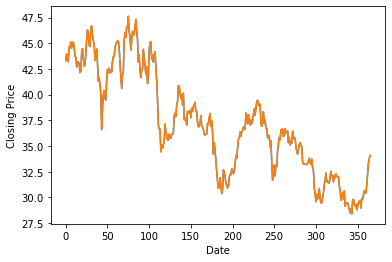

In [166]:


# import matplotlib library
#import matplotlib.pyplot as plt
luv_plus['Adj Close'].plot(kind='line')
# create a line chart of the 'Close' column in luv_plus
plt.plot(luv_plus['Adj Close'])

# add labels to the x and y axes
plt.xlabel('Date')
plt.ylabel('Closing Price')

# show the plot
plt.show()


<font size = 6>Daily Returns & Clean Up Files</font>

In [86]:
for ticker in tickers2:
    print(f"Working on: {ticker}")
    stock_df = get_df_from_csv(ticker)
    add_daily_return_to_df(stock_df, ticker)
    stock_df = delete_unnamed_cols(stock_df)
    save_dataframe_to_csv(stock_df, ticker)

Working on: A
Working on: AA
Working on: AAT
Working on: AAP
Working on: AAXN
Working on: AAME
Working on: AAN
Working on: ABM
Working on: ABG
Working on: ABEO
Working on: AAOI
Working on: AAPL
Working on: AAL
Working on: ABIO
Working on: AAON
Working on: ABCB
Working on: ABBV
Working on: AAWW
Working on: ABC
Working on: ABMD


In [64]:
listdir(folder)

['A.csv',
 'AA.csv',
 'AAT.csv',
 'AAP.csv',
 'AAXN.csv',
 'AAME.csv',
 'AAN.csv',
 'ABM.csv',
 'ABG.csv',
 'ABEO.csv',
 'AAOI.csv',
 'AAPL.csv',
 'AAL.csv',
 'ABIO.csv',
 'AAON.csv',
 'ABCB.csv',
 'ABBV.csv',
 'AAWW.csv',
 'ABC.csv',
 'ABMD.csv']

In [202]:
tickers2

['A',
 'AA',
 'AAT',
 'AAP',
 'AAXN',
 'AAME',
 'AAN',
 'ABM',
 'ABG',
 'ABEO',
 'AAOI',
 'AAPL',
 'AAL',
 'ABIO',
 'AAON',
 'ABCB',
 'ABBV',
 'AAWW',
 'ABC',
 'ABMD']

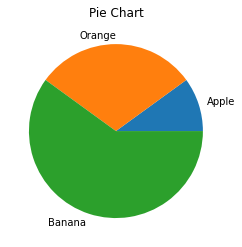

In [91]:
sizes = [10, 30, 60]
labels = ['Apple', 'Orange', 'Banana']
plt.pie(sizes, labels=labels)
plt.title("Pie Chart")
plt.show()

In [143]:
sofi.sketch.ask("what is this dataset about")

In [186]:
sofi
sofi['Close'].var()

5.720141573907139

<font size = 6>Numpy Examples</font>

In [146]:
arr = np.arange(18)

In [147]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [150]:
shaped = arr.reshape(3,6)

In [149]:
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [155]:
for i in arr:
    if i > 11:
        print(i)
else:
    print("and we are finished!")

12
13
14
15
16
17
and we are finished!


In [156]:
len(arr)

18

In [163]:
luv_plus.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'daily_return'],
      dtype='object')

In [164]:
luv_plus['Date']

0      2022-01-03
1      2022-01-04
2      2022-01-05
3      2022-01-06
4      2022-01-07
          ...    
361    2023-06-12
362    2023-06-13
363    2023-06-14
364    2023-06-15
365    2023-06-16
Name: Date, Length: 366, dtype: object

In [78]:
folder = "/home/champ/code/Python4Finance/champlist/"
apple = get_stock_df_from_csv(folder, 'AAPL')
type(apple.tail())
apple

,Date,Adj Close
0,2020-01-02,73.347939
1,2020-01-03,72.634842
2,2020-01-06,73.213631
3,2020-01-07,72.869286
4,2020-01-08,74.041489
...,...,...
873,2023-06-22,187.000000
874,2023-06-23,186.679993
875,2023-06-26,185.270004
876,2023-06-27,188.059998


In [79]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple[apple['Date'] == S_DATE]['Adj Close'][0]

73.34793853759766

In [81]:
apple[apple['Date'] == E_DATE]['Adj Close'][877]

189.25

In [110]:
appl = get_roi_defined_time(apple)
appl

Initial Price: 73.34793853759766
Final Price: 189.25
Adj Close


1.5801679470922245

In [95]:
apple[apple['Date'] == S_DATE]['Adj Close'][0]

0    73.347939
Name: Adj Close, dtype: float64

In [96]:
apple[apple['Date'] == E_DATE]['Adj Close'][877]
#E_DATE_STR

189.25

In [45]:
type(E_DATE)
type(S_DATE)

str

In [89]:
sdate, edate = get_valid_dates(apple, S_DATE, E_DATE)

In [176]:
type(apple)

pandas.core.frame.DataFrame

In [177]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       878 non-null    datetime64[ns]
 1   Adj Close  878 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.8 KB


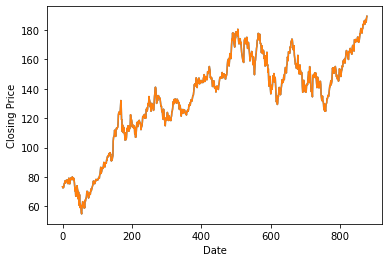

In [97]:
# import matplotlib library
#import matplotlib.pyplot as plt
apple.set_index(['Date'])
apple['Adj Close'].plot(kind='line')
# create a line chart of the 'Close' column in luv_plus
plt.plot(apple['Adj Close'])

# add labels to the x and y axes
plt.xlabel('Date')
plt.ylabel('Closing Price')

# show the plot
plt.show()

<font size = 6>Testing ROI Between</font>

In [109]:
apple.loc[100: 'Date']

,Date,Adj Close
100,2020-05-27,78.080223
101,2020-05-28,78.114594
102,2020-05-29,78.038513
103,2020-06-01,78.998222
104,2020-06-02,79.363960
...,...,...
873,2023-06-22,187.000000
874,2023-06-23,186.679993
875,2023-06-26,185.270004
876,2023-06-27,188.059998


In [88]:
sdate, edate = get_valid_dates(apple, '2020-01-01', '2023-06-28')
sdate
edate
roi_between_dates(apple, sdate, edate)

1.5801679470922245

In [113]:
dfSummary(apple)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Date[datetime64[ns]],"Min: 2020-01-02Max: 2023-06-28Duration: 1,273 days",878 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAG8AAAA2CAYAAADJRMdfAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABOElEQVR4nO3WMU6EQBhA4dGYQDG2bGFjuMCeYE9g5QnmXnRzAjtv4D1sLKSmJMF2o5j9XVfJS97XQYB/4E3B1bIsSUzXWy9A57tZO9l13WPOeXfq5mma3sdxfLrkgracvYXo+6b09Z1X4+Wcd6WUt1MPG4bhoe/7yIe+zzm/RhbYtu2+lPL837P/4LrQ5op+65RSqrXeHR+vxotqmuY2MrjWeiilvESeWWs9bDH70tdFN9c8z/uUUijeZ7+Kp+/9ZHOdO8MfFjDjgRkPzHhgxgMzHpjxwIwHZjww44EZD8x4YMYDMx6Y8cCMB2Y8MOOBGQ/MeGDGAzMemPHAjAdmPDDjgRkPzHhgxgMzHpjxwIwHZjww44EZD8x4YMYDMx6Y8cCMB2Y8MOOBGQ/MeGDGAzMemPHAjAf2AdbKYbPYJM2IAAAAAElFTkSuQmCC"">",0(0.0%)
2,Adj Close[float64],Mean (sd) : 133.3 (31.1)min < med < max:54.9 < 140.6 < 189.2IQR (CV) : 36.5 (4.3),867 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABVElEQVR4nO3bsW2DQBSH8UsUiebS4sIdC8QLZAhPQOu1mMBTpTA1DRISnsDxPeAO9P7fr6Y48cnvjA9/zPMc4N/n3gtAGV97L+Do6rq+xhhPKdcOw/Do+/6ee01LEPqNGOOpbdu/lGu7rjvnXs9SjG4RhBZBaBGEFkFoEYQWQWgRks/Rlh9Bpmn6CSEkPUcfmWRo448gv7nXUwKjWwShRUiO7lzGcbw0TXNLvb7kIQihN1RV1Xfq3h9C2UMQQu/IMgHWfvoJvSPLBFj76efLmAhCiyC0CEKLILQIQosgtAg3z9GKR48WbkIrHj1aMLpFEFrEJqPby/+TPNsktJf/J3nG6BZBaBGEFkFoEYQWQWgRhBZBaBGEFlH89Krku8yerL1vL0PnOt8t+S6zJ2vv28vQnO/6wh4t4tBvmFj2JcXXgywOHdq4L7F9/IPRLYLQIggt4gnOtIC74zrilAAAAABJRU5ErkJggg=="">",0(0.0%)


In [115]:
sdate

'2020-01-03'

In [119]:
get_cov_between_dates(apple, sdate, edate)

0.23214774517267317

In [120]:
get_std_between_dates(apple, sdate, edate)

30.96734938636406

In [121]:
get_avg_between_dates(apple, sdate, edate)

133.39500395892418